# Multivariate analysis: Cluster models

Interesting sources:
- https://www.coursera.org/learn/python-machine-learning?specialization=data-science-python 
- https://www.edx.org/course/machine-learning-with-python-a-practical-introduct

![](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png "Data Science Lifecycle")

Previous lesson we looked at creating predictive models. We chose one variable (One column) which we wanted to predict based on other variables (Other columns). We discussed multiple example problems like predicting which customers the company will lose, labeling mail as spam or none-spam. 

However, there are also situations in which we are not interested in predicting one specific column. Sometimes we are interested in knowing if there are rows which are very similar to eachother, preferably large groups of rows which are very similar to eachother. This is known as a clustering problem. Examples of this include:
- Are there groups of customers (Rows) with very similar behaviour (Columns)?
- Are there products (Rows) with very similar characteristics (Columns)?
- Are there products (Rows) which have been purchased by the same customers (Columns)?

Interesting sources about more business cases:
- https://datafloq.com/read/7-innovative-uses-of-clustering-algorithms/6224
- https://www.dotactiv.com/blog/why-k-means-clustering-is-good-for-business

Examples of clustering algorithms:
- K-means
- BIRCH
- DBSCAN
- Mean Shift

## Clustering: K-means

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png "Iris dataset") 

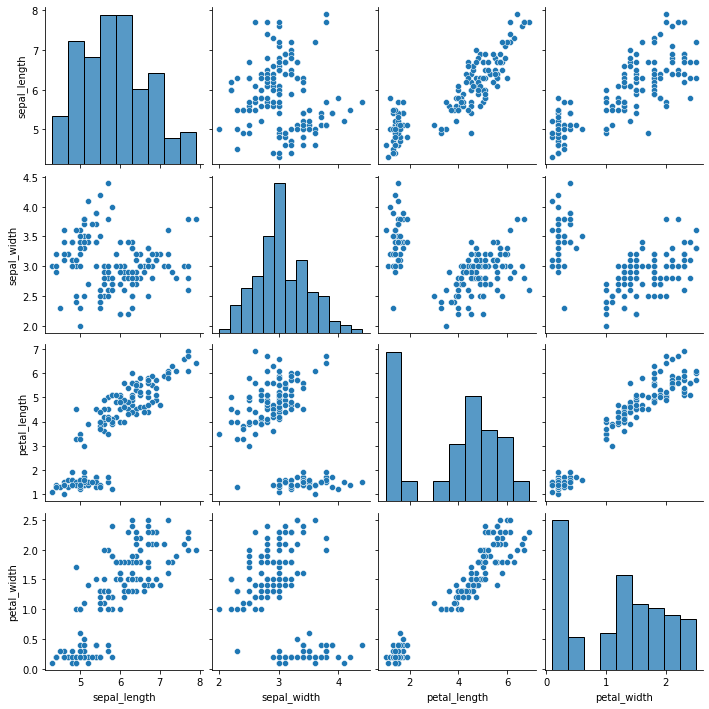

In [3]:
sns.pairplot(iris)

In [4]:
features = ['sepal_length','sepal_width','petal_length', 'petal_width']
km = KMeans(n_clusters=2, random_state=42).fit(iris[features])

In [5]:
iris['cluster'] = km.predict(iris[features])

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [7]:
iris.cluster.value_counts()

1    97
0    53
Name: cluster, dtype: int64

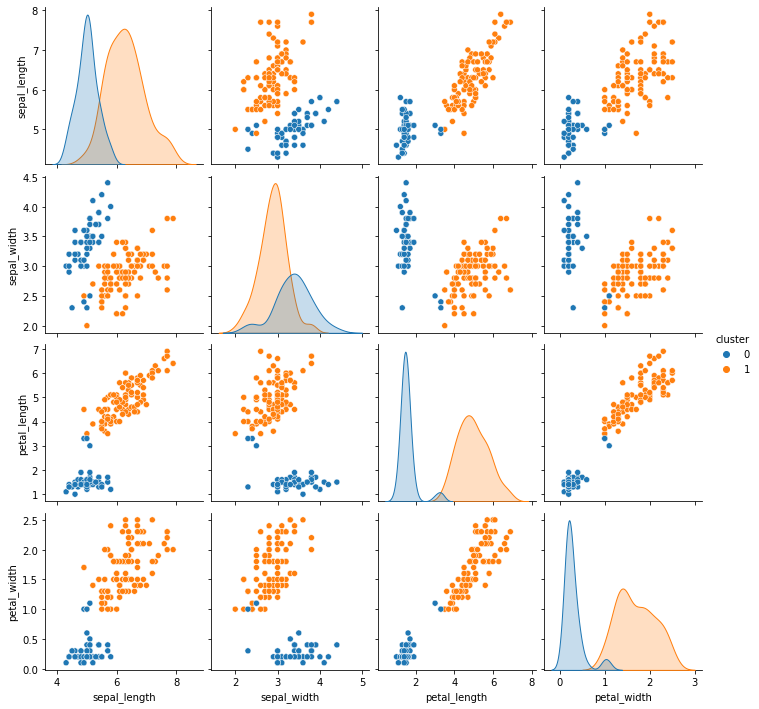

In [8]:
sns.pairplot(iris, hue="cluster")

Showing how K-means works:
- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://stanford.edu/class/engr108/visualizations/kmeans/kmeans.html

## Evaluating the model

Evaluating a cluster model is tricky because there isn't always one objectively correct or best cluster. Clustering results are partially subjective.  
This was different for predictive models because we can measure how correct their predictions are on new data.

Interesting sources:
- https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In this lesson we will be using Silhouette Coefficient to evaluate our cluster. See 2.3.10.5 in the link above.

In [9]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [10]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(iris[features], km.labels_, metric='euclidean')

0.6810461692117465

For most typical clustering problems we don't have any 'classes'. However, because we know the species of the iris flowers it could be interesting to compare them to our clusters.

C:\Users\afrash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\afrash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


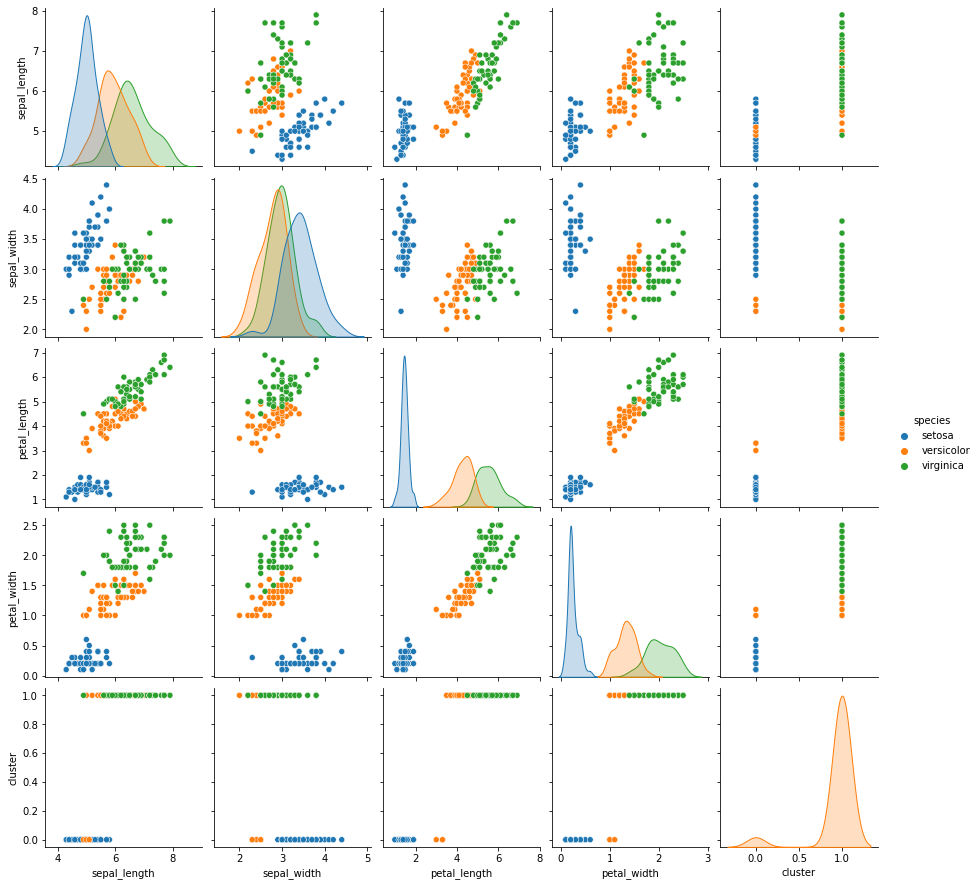

In [11]:
sns.pairplot(iris, hue="species")

In [12]:
contingency_table = iris.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
setosa,50,0
versicolor,3,47
virginica,0,50


## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [13]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


![](https://i.imgur.com/0v1CGNV.png)